# Prediction of creditworthiness for credit card applications

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [88]:
credit_df = pd.read_csv('data/credit_record.csv')
application_df = pd.read_csv('data/application_record.csv')
credit_df.head(30)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [89]:
application_df.head(15)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [90]:
print(np.isin(credit_df['ID'], application_df['ID']).sum())
print((credit_df['ID'].shape)[0])

777715
1048575


In [91]:
credit_df = credit_df[credit_df['ID'].isin(application_df['ID'])]
credit_df.reset_index(drop=True, inplace=True)
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5008804,0,C
1,5008804,-1,C
2,5008804,-2,C
3,5008804,-3,C
4,5008804,-4,C


In [92]:
approved_applications = application_df[np.isin(application_df['ID'], credit_df['ID'])]
approved_applications.reset_index(drop=True, inplace=True)
approved_applications.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [93]:
approved_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [94]:
for column in approved_applications.columns:
    if column == "ID":
        continue
    print("--------------------")
    print(column, approved_applications[column].nunique())
    print(approved_applications[column].value_counts())
    print("--------------------")
    

--------------------
CODE_GENDER 2
CODE_GENDER
F    24430
M    12027
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_CAR 2
FLAG_OWN_CAR
N    22614
Y    13843
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_REALTY 2
FLAG_OWN_REALTY
Y    24506
N    11951
Name: count, dtype: int64
--------------------
--------------------
CNT_CHILDREN 9
CNT_CHILDREN
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: count, dtype: int64
--------------------
--------------------
AMT_INCOME_TOTAL 265
AMT_INCOME_TOTAL
135000.0    4309
180000.0    3097
157500.0    3089
112500.0    2956
225000.0    2926
            ... 
177750.0       1
594000.0       1
164250.0       1
124200.0       1
179271.0       1
Name: count, Length: 265, dtype: int64
--------------------
--------------------
NAME_INCOME_TYPE 5
NAME_INCOME_TYPE
Working                 18819
Commercial associate     8490
Pensioner      

In [95]:
(approved_applications[(approved_applications['DAYS_EMPLOYED'] > 0) & (approved_applications['NAME_INCOME_TYPE'] == 'Pensioner')].shape)[0]

6135

In [96]:
for column in application_df.columns:
    if column == "ID":
        continue
    print("--------------------")
    print(column, application_df[column].nunique())
    print(application_df[column].value_counts())
    print("--------------------")

--------------------
CODE_GENDER 2
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_CAR 2
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_REALTY 2
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64
--------------------
--------------------
CNT_CHILDREN 12
CNT_CHILDREN
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: count, dtype: int64
--------------------
--------------------
AMT_INCOME_TOTAL 866
AMT_INCOME_TOTAL
135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: count, Length: 866, dtype: int64
--------------------
--------------------
NAME_INCOME_TYPE 5
NAME_INCOME_TYPE
Working  

In [97]:
(application_df[(application_df['DAYS_EMPLOYED'] > 0) & (application_df['NAME_INCOME_TYPE'] == 'Pensioner')].shape)[0]


75329

In [98]:
print(application_df[application_df['DAYS_EMPLOYED'] == 0].shape[0])
print(approved_applications[approved_applications['DAYS_EMPLOYED'] == 0].shape[0])


0
0


In [99]:
def rename_columns(df, column_name, new_column_name):
    df.rename(columns={column_name: new_column_name}, inplace=True)
    return df

In [100]:
def encode_dataframe_columns(data_train, data_test, encoder, columns_list):
    for column in columns_list:
            data_train[column] = encoder.fit_transform(data_train[column])
            data_test[column] = encoder.transform(data_test[column])
    return data_train, data_test

In [101]:
# iDEA: analizzo il dataset di quelli che hanno ricevuto la carta di credito. In base a questi campioni, mi faccio "un'idea" di come dovrebbe essere un cliente che 
# riceve la carta di credito. Poi, analizzo il dataset di tutti i clienti e vedo se ci sono delle differenze significative. 
# Se ci sono, allora posso dire che ci sono delle caratteristiche che influenzano il fatto di ricevere la carta di credito o meno.
# Inoltre posso valutare tra i clienti che hanno ricevuto la carta, quelli che sono affidabili e quelli che non lo sono.


In [102]:
def preprocess_dataframe(data):
    data.loc[:, 'DAYS_BIRTH'] = data['DAYS_BIRTH'].map(lambda x: int(-x / 365) if x < 0 else 0)
    data.loc[:, 'DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].map(lambda x: int(-x / 365) if x < 0 else 0) 
    data = rename_columns(data, 'DAYS_BIRTH', 'AGE')
    data = rename_columns(data, 'DAYS_EMPLOYED', 'YEARS_EMPLOYED')
    data = data.drop(columns=["CODE_GENDER", "CNT_CHILDREN"])
    data.loc[:, "AVAILABILITY"] = (data["FLAG_MOBIL"] + data["FLAG_WORK_PHONE"] + data["FLAG_PHONE"] + data["FLAG_EMAIL"])/4
    data = data.drop(columns=["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"])

    marriage_mapper = {"Single / not married": 0, "Married": 1, "Civil marriage": 1, "Separated": 2, "Widow": 3}
    data.loc[:, "NAME_FAMILY_STATUS"] = data["NAME_FAMILY_STATUS"].map(marriage_mapper)

    return data

In [103]:
approved_applications = preprocess_dataframe(approved_applications)

/tmp/ipykernel_4570/198459180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={column_name: new_column_name}, inplace=True)


In [104]:
approved_applications.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AVAILABILITY
0,5008804,Y,Y,427500.0,Working,Higher education,1,Rented apartment,32,12,NaN,2.0,0.50
1,5008805,Y,Y,427500.0,Working,Higher education,1,Rented apartment,32,12,NaN,2.0,0.50
2,5008806,Y,Y,112500.0,Working,Secondary / secondary special,1,House / apartment,58,3,Security staff,2.0,0.25
3,5008808,N,Y,270000.0,Commercial associate,Secondary / secondary special,0,House / apartment,52,8,Sales staff,1.0,0.75
4,5008809,N,Y,270000.0,Commercial associate,Secondary / secondary special,0,House / apartment,52,8,Sales staff,1.0,0.75


In [105]:
print("Unique ID : ", credit_df['ID'].nunique())
print(credit_df['MONTHS_BALANCE'].value_counts())
credit_df[credit_df['ID'] == 5008809]

Unique ID :  36457
MONTHS_BALANCE
-1     24963
-2     24871
 0     24672
-3     24644
-4     24274
       ...  
-56     1588
-57     1253
-58      955
-59      627
-60      321
Name: count, Length: 61, dtype: int64


,ID,MONTHS_BALANCE,STATUS
66,5008809,-22,X
67,5008809,-23,X
68,5008809,-24,X
69,5008809,-25,X
70,5008809,-26,X


In [106]:
round(approved_applications[["AMT_INCOME_TOTAL", "AGE", "YEARS_EMPLOYED", "CNT_FAM_MEMBERS", "AVAILABILITY"]].describe(), 2)

,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,AVAILABILITY
count,36457.00,36457.00,36457.00,36457.00,36457.00
mean,186685.74,43.26,5.61,2.20,0.40
std,101789.23,11.51,6.42,0.91,0.19
min,27000.00,20.00,0.00,1.00,0.25
25%,121500.00,34.00,1.00,2.00,0.25
50%,157500.00,42.00,4.00,2.00,0.25
75%,225000.00,53.00,8.00,3.00,0.50
max,1575000.00,68.00,43.00,20.00,1.00


In [107]:
class Client:
    def __init__(self, id, info, credit_info):
        self.id = id
        self._info = info
        self._credit_info = credit_info
        self.status = credit_info['STATUS'].value_counts()
        self.history = credit_info.shape[0]
        self.pay_stats = {'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, 'C':0, 'X':0}
        self._get_pay_stats()
        self.reliability = 0
        self.creditworthiness = 1
        self._reliability_setted = False
        
    def __str__(self):
        return "ID: " + str(self.id) + " Status: " + str(self.status) + " history: " + str(self.history) + " History Status Reliability: " + str(self.get_history_reliability) + " Last Period Status Reliability: " + str(self.get_last_period_status_reliability)
    
    def __repr__(self):
        return "ID: " + str(self.id) + " Status: " + str(self.status) + " history: " + str(self.history) + " History Status Reliability: " + str(self.get_history_reliability) + " Last Period Status Reliability: " + str(self.get_last_period_status_reliability)
    
    def _get_pay_stats(self):
        for k in self.status.keys():
            if(k in self.status.index):
                self.pay_stats[k] = self.status[k]/self.history

    def get_history_reliability(self):        
        if self.pay_stats['5'] > 0.40:
            return 0
        elif self.pay_stats['5'] > 0.25 or self.pay_stats['4'] > 0.40:
            return 1
        elif self.pay_stats['4'] > 0.25 or self.pay_stats['3'] > 0.40:
            return 2
        elif self.pay_stats['3'] > 0.25 or self.pay_stats['2'] > 0.40:
            return 3
        elif self.pay_stats['2'] > 0.25 or self.pay_stats['1'] > 0.40:
            return 4
        elif self.pay_stats['1'] > 0.25 or self.pay_stats['0'] > 0.40:
            return 5
        elif self.pay_stats['0'] > 0.25 or self.pay_stats['C'] < 0.65:
            return 6
        return 7

    def get_last_period_reliability(self):
        last_period_check = 5 if self.history > 12 else int(self.history/2)
        reliability = 7
        i = 0
        for _, row in self._credit_info.iterrows():
            if i == last_period_check:
                break
            if row['STATUS'] == '5':
                reliability = int(reliability*0.2) 
            elif row['STATUS'] == '4': 
                reliability = int(reliability*0.35)
            elif row['STATUS'] == '3':
                reliability = int(reliability*0.5)
            elif row['STATUS'] == '2':
                reliability = int(reliability*0.65)
            elif row['STATUS'] == '1':
                reliability = int(reliability*0.80)
            elif row['STATUS'] == '0':
                reliability = 6
            elif row['STATUS'] == 'C' or row['STATUS'] == 'X':
                reliability = 7
            i+=1
        return reliability
        
    def set_reliability(self):
        self.reliability = int((self.get_history_reliability() * 0.65 + self.get_last_period_reliability() * 0.35))
        if self.reliability < 4:
            self.creditworthiness = 0
        self._reliability_setted = True

    def get_reliability(self):
        if not self._reliability_setted:
            self.set_reliability()
        return self.reliability
    
    def get_creditworthiness(self):
        if not self._reliability_setted:
            self.set_reliability()
        return self.creditworthiness

    def get_client_status(self):
        return self.status
    
    def get_client_history(self):
        return self.history
    
    def get_client_id(self):
        return self.id

In [108]:
ids = approved_applications['ID'].unique()
clients_creditworthiness = { "CLIENT_RELIABILITY": [], "CLIENT_CREDITWORTHINESS": []}

for id in ids:
    client=Client(id, approved_applications[(approved_applications['ID'] == id).drop(columns=['ID'])], credit_df[(credit_df['ID'] == id).drop(columns=['ID'])])
    clients_creditworthiness["CLIENT_RELIABILITY"].append(client.get_reliability())
    clients_creditworthiness["CLIENT_CREDITWORTHINESS"].append(client.get_creditworthiness())

approved_applications = approved_applications.join(pd.DataFrame(clients_creditworthiness))
       

In [109]:
credit_df[credit_df['ID'] == 5135344].head(10)

,ID,MONTHS_BALANCE,STATUS
671459,5135344,0,5
671460,5135344,-1,5
671461,5135344,-2,5
671462,5135344,-3,5
671463,5135344,-4,5
671464,5135344,-5,5
671465,5135344,-6,5
671466,5135344,-7,5
671467,5135344,-8,5
671468,5135344,-9,5


In [110]:
approved_applications[approved_applications['ID'] == 5135344]

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AVAILABILITY,CLIENT_RELIABILITY,CLIENT_CREDITWORTHINESS
31722,5135344,N,Y,112500.0,Commercial associate,Higher education,1,House / apartment,55,1,Security staff,2.0,0.25,0,0


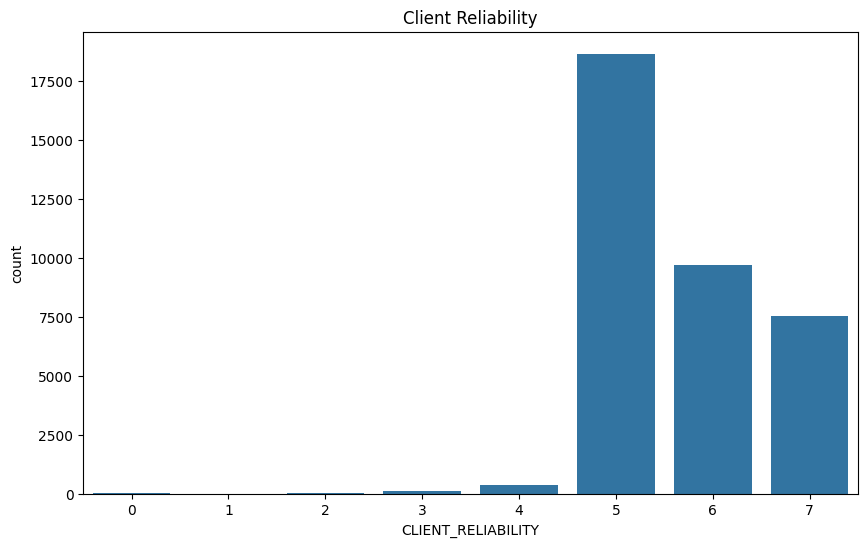

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='CLIENT_RELIABILITY', data=approved_applications)
plt.title('Client Reliability')
plt.show()


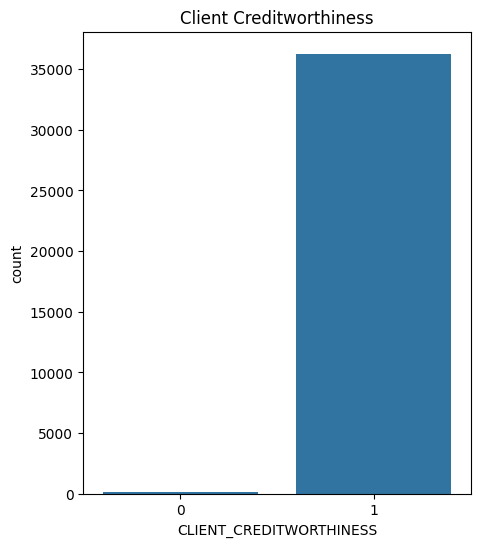

In [112]:
plt.figure(figsize=(5, 6))
sns.countplot(x='CLIENT_CREDITWORTHINESS', data=approved_applications)
plt.title('Client Creditworthiness')
plt.show()

In [113]:
approved_applications['AGE'].value_counts()

AGE
37    1207
27    1129
28    1126
40    1125
39    1105
34    1057
33    1054
38    1047
32    1041
41    1040
42    1035
35    1013
43    1003
30    1002
36     966
31     944
44     930
29     929
46     893
47     890
51     889
48     871
54     845
50     844
57     833
56     813
59     809
60     803
45     779
53     765
58     752
52     746
49     746
55     656
62     634
64     547
63     544
61     538
26     517
25     489
24     368
65     339
66     268
23     213
22     146
67     120
68      36
21      10
20       1
Name: count, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

RANDOM_STATE = 7
columns_to_encode = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_HOUSING_TYPE"]

columns_to_not_encode = ["AMT_INCOME_TOTAL", "NAME_FAMILY_STATUS", "AGE", "YEARS_EMPLOYED", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "AVAILABILITY"]

X = approved_applications.drop(columns=['ID', 'CLIENT_RELIABILITY', 'CLIENT_CREDITWORTHINESS'])
y = approved_applications['CLIENT_CREDITWORTHINESS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

oe = OrdinalEncoder(encoded_missing_value = -1, handle_unknown = 'use_encoded_value', unknown_value = -2)
column_transformer = ColumnTransformer([('encoder', OrdinalEncoder(), columns_to_encode)], remainder='passthrough')
column_transformer.set_output(transform='pandas')
X_train["OCCUPATION_TYPE"] = oe.fit_transform(X_train["OCCUPATION_TYPE"].values.reshape(-1, 1))
X_train = column_transformer.fit_transform(X_train)
X_test["OCCUPATION_TYPE"] = oe.transform(X_test["OCCUPATION_TYPE"].values.reshape(-1, 1))
X_test = column_transformer.transform(X_test)

In [118]:
X_train = pd.DataFrame(X_train, columns=columns_to_encode)
X_test = pd.DataFrame(X_test, columns=columns_to_encode)

ValueError: Shape of passed values is (29165, 27), indices imply (29165, 5)

In [120]:
X_train.head(10)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [121]:
X_train = X_train.astype('int64')
X_test = X_test.astype('int64')

print(y_train.value_counts())

ValueError: cannot convert float NaN to integer

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


ValueError: could not convert string to float: 'Laborers'

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_reg = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_std, y_train)
print("Accuracy: ", log_reg.score(X_test_std, y_test))
y_pred_proba = log_reg.predict_proba(X_test_std)
y_pred = np.where(y_pred_proba[:,1] > 0.7, 1, 0)

print(classification_report(y_test, y_pred))

Accuracy:  0.5610257816785519
              precision    recall  f1-score   support

           0       0.01      0.95      0.01        37
           1       0.99      0.05      0.10      7255

    accuracy                           0.05      7292
   macro avg       0.50      0.50      0.05      7292
weighted avg       0.99      0.05      0.09      7292



In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_forest = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, class_weight='balanced')
rnd_forest.fit(X_train_std, y_train)
y_pred = rnd_forest.predict(X_test_std)
accuracy_score(y_test, y_pred)


0.9857377948436643

In [72]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0   37]
 [   0 7255]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.99      1.00      1.00      7255

    accuracy                           0.99      7292
   macro avg       0.50      0.50      0.50      7292
weighted avg       0.99      0.99      0.99      7292



/home/enrico/Machine_learning/prediction-of-creditworthiness-for-credit-card-issuance/project_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/Machine_learning/prediction-of-creditworthiness-for-credit-card-issuance/project_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/Machine_learning/prediction-of-creditworthiness-for-credit-card-issuance/project_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision 

In [70]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

ovsr = OneVsRestClassifier(SVC()).fit(X_train_std, y_train)
y_pred = ovsr.predict(X_test_std)
accuracy_score(y_test, y_pred)


0.9949259462424574

In [71]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(25, 50, 50), max_iter=1000, random_state=RANDOM_STATE)
mlp.fit(X_train_norm, y_train)
y_pred = mlp.predict(X_test_norm)
accuracy_score(y_test, y_pred)


0.9949259462424574

In [251]:
if 0:
    import gap_statistic as gs
    X_train_cat = X_train.drop(columns=['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])
    optimalK = gs.OptimalK(parallel_backend='multiprocessing')
    optimalK(X_train_cat, cluster_array=np.arange(3, 10))

    from kmodes.kmodes import KModes
    from kmodes.kprototypes import KPrototypes

    km = KModes(n_clusters=7, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(X_train_cat)
    print(km.cluster_centroids_)
    print(km.labels_)
